### A limpeza de dados (ou Data Cleaning)

A limpeza de dados (ou Data Cleaning) é uma das etapas mais cruciais e demoradas em qualquer projeto de ciência de dados. A qualidade da sua análise e dos seus modelos de Machine Learning depende diretamente da qualidade dos seus dados.

Usando a biblioteca Pandas em Python, o processo de limpeza geralmente segue estas etapas bem definidas. Vamos usar um exemplo prático para ilustrar cada uma delas.

Imagine que temos o seguinte DataFrame "sujo":

In [35]:
import pandas as pd
import numpy as np

data = {
    'produto': ['  Produto A ', 'Produto B', 'Produto C', 'Produto A', 'Produto D', 'Produto E', 'Produto E', None],
    'data_venda': ['2025-10-01', '2025-10-02', '2025-10-03', '2025-10-01', '2025-10-05', '2025-10-06','2025-10-06', '2025-10-07'],
    'valor': ['R$ 50,50', 'R$ 70,00', 'R$ 30,25', 'R$ 50,50', 'R$ 1500,00', None, None, 'R$ 90,10'],
    'estoque': [100, 50, None, 100, 5, 200, 200, 10],
    'cidade': ['São Paulo', 'sp', 'Rio de Janeiro', 'São Paulo', 'Belo Horizonte', 'são paulo', 'são paulo', 'Recife']
}
df = pd.DataFrame(data)
df

,produto,data_venda,valor,estoque,cidade
0,Produto A,2025-10-01,"R$ 50,50",100.0,São Paulo
1,Produto B,2025-10-02,"R$ 70,00",50.0,sp
2,Produto C,2025-10-03,"R$ 30,25",NaN,Rio de Janeiro
3,Produto A,2025-10-01,"R$ 50,50",100.0,São Paulo
4,Produto D,2025-10-05,"R$ 1500,00",5.0,Belo Horizonte
5,Produto E,2025-10-06,None,200.0,são paulo
6,Produto E,2025-10-06,None,200.0,são paulo
7,None,2025-10-07,"R$ 90,10",10.0,Recife


## Este é o nosso ponto de partida. Agora, vamos limpar!

### **Passo 0:** Inspeção Inicial dos Dados

Antes de modificar qualquer coisa, você precisa entender a "sujeira".
Visualizar as primeiras linhas: Para ter uma ideia da estrutura.

In [36]:
print(df.head())

        produto  data_venda       valor  estoque          cidade
0    Produto A   2025-10-01    R$ 50,50    100.0       São Paulo
1     Produto B  2025-10-02    R$ 70,00     50.0              sp
2     Produto C  2025-10-03    R$ 30,25      NaN  Rio de Janeiro
3     Produto A  2025-10-01    R$ 50,50    100.0       São Paulo
4     Produto D  2025-10-05  R$ 1500,00      5.0  Belo Horizonte


In [37]:
# Obter informações gerais: 
# Essencial para ver os tipos de dados (Dtype) e a contagem de valores não nulos.


print(df.info())

# Nesta etapa, você já notaria que valor é do tipo object (texto) e não um número, 
# e que produto, valor e estoque têm valores ausentes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   produto     7 non-null      object 
 1   data_venda  8 non-null      object 
 2   valor       6 non-null      object 
 3   estoque     7 non-null      float64
 4   cidade      8 non-null      object 
dtypes: float64(1), object(4)
memory usage: 448.0+ bytes
None


In [38]:
## Resumo estatístico: Útil para ter uma noção da distribuição dos dados numéricos 
# e identificar possíveis outliers (como o valor 1500 em estoque, talvez?).

print(df.describe())

          estoque
count    7.000000
mean    95.000000
std     81.086374
min      5.000000
25%     30.000000
50%    100.000000
75%    150.000000
max    200.000000


### **Passo 1:** Tratamento de Dados Duplicados
Dados duplicados podem distorcer análises e resultados de modelos.

Identificar duplicatas:

In [39]:

print(df.duplicated().sum()) # Retorna o número de linhas duplicadas

1


In [40]:
# Remover duplicatas:


df = df.drop_duplicates(keep='first', inplace=False)

# keep='first': Mantém a primeira ocorrência da linha duplicada.
# inplace=False: Retorna um novo DataFrame com as alterações (boa prática). 
# Se True, altera o DataFrame original.

In [41]:
print(df.duplicated().sum()) # Retorna o número de linhas duplicadas

0


In [42]:
# Check New Dataframe
df

,produto,data_venda,valor,estoque,cidade
0,Produto A,2025-10-01,"R$ 50,50",100.0,São Paulo
1,Produto B,2025-10-02,"R$ 70,00",50.0,sp
2,Produto C,2025-10-03,"R$ 30,25",NaN,Rio de Janeiro
3,Produto A,2025-10-01,"R$ 50,50",100.0,São Paulo
4,Produto D,2025-10-05,"R$ 1500,00",5.0,Belo Horizonte
5,Produto E,2025-10-06,None,200.0,são paulo
7,None,2025-10-07,"R$ 90,10",10.0,Recife


## **Passo 2:** Tratamento de Valores Ausentes (NaN)
Valores ausentes (nulos ou NaN) são um dos problemas mais comuns.
Identificar valores ausentes:

In [43]:

print(df.isnull().sum()) # Mostra a contagem de nulos por coluna

produto       1
data_venda    0
valor         1
estoque       1
cidade        0
dtype: int64


## Decidir a estratégia:

Remover: Se a quantidade de dados ausentes for pequena ou se a linha/coluna for irrelevante.



In [44]:
# Remove todas as linhas que contêm pelo menos um valor nulo
df_sem_nulos = df.dropna()

## Preencher (Imputação): A estratégia mais comum.


In [45]:
# Preencher 'estoque' com a mediana (robusto a outliers)
mediana_estoque = df['estoque'].median()
df['estoque'].fillna(mediana_estoque, inplace=True)

# Para dados categóricos como 'produto', podemos preencher com 'desconhecido'
df['produto'].fillna('desconhecido', inplace=True)

# Vamos remover a linha onde 'valor' é nulo neste exemplo
df.dropna(subset=['valor'], inplace=True)

/tmp/ipykernel_56500/1483688868.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['estoque'].fillna(mediana_estoque, inplace=True)
/tmp/ipykernel_56500/1483688868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['estoque'].fillna(mediana_estoque, inplace=True)
/tmp/ipykernel_56500/1483688868.py:6: FutureWarning: A value is trying to

In [46]:
# Check New Dataframe
df

,produto,data_venda,valor,estoque,cidade
0,Produto A,2025-10-01,"R$ 50,50",100.0,São Paulo
1,Produto B,2025-10-02,"R$ 70,00",50.0,sp
2,Produto C,2025-10-03,"R$ 30,25",75.0,Rio de Janeiro
3,Produto A,2025-10-01,"R$ 50,50",100.0,São Paulo
4,Produto D,2025-10-05,"R$ 1500,00",5.0,Belo Horizonte
7,desconhecido,2025-10-07,"R$ 90,10",10.0,Recife


### Passo 3: Correção dos Tipos de Dados (Data Types)
Garantir que cada coluna esteja no formato correto é fundamental para realizar cálculos e análises.

Coluna valor (de texto para número): Precisamos remover "R$", espaços e trocar a vírgula por ponto.


In [47]:
df['valor'] = df['valor'].str.replace('R$', '', regex=False).str.replace(',', '.').str.strip()
df['valor'] = pd.to_numeric(df['valor'])

/tmp/ipykernel_56500/722994490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['valor'] = df['valor'].str.replace('R$', '', regex=False).str.replace(',', '.').str.strip()
/tmp/ipykernel_56500/722994490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['valor'] = pd.to_numeric(df['valor'])


In [48]:
# Check New Dataframe
df

,produto,data_venda,valor,estoque,cidade
0,Produto A,2025-10-01,50.50,100.0,São Paulo
1,Produto B,2025-10-02,70.00,50.0,sp
2,Produto C,2025-10-03,30.25,75.0,Rio de Janeiro
3,Produto A,2025-10-01,50.50,100.0,São Paulo
4,Produto D,2025-10-05,1500.00,5.0,Belo Horizonte
7,desconhecido,2025-10-07,90.10,10.0,Recife


In [49]:
## Coluna data_venda (de texto para data):

df['data_venda'] = pd.to_datetime(df['data_venda'])
df

/tmp/ipykernel_56500/1693358689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_venda'] = pd.to_datetime(df['data_venda'])


,produto,data_venda,valor,estoque,cidade
0,Produto A,2025-10-01,50.50,100.0,São Paulo
1,Produto B,2025-10-02,70.00,50.0,sp
2,Produto C,2025-10-03,30.25,75.0,Rio de Janeiro
3,Produto A,2025-10-01,50.50,100.0,São Paulo
4,Produto D,2025-10-05,1500.00,5.0,Belo Horizonte
7,desconhecido,2025-10-07,90.10,10.0,Recife


In [50]:
### Após essas conversões, mostrará os tipos corretos: 
# float64 para valor e datetime64[ns] para data_venda.
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   produto     6 non-null      object        
 1   data_venda  6 non-null      datetime64[ns]
 2   valor       6 non-null      float64       
 3   estoque     6 non-null      float64       
 4   cidade      6 non-null      object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 288.0+ bytes


## **Passo 4:** Padronização e Limpeza de Texto

Dados de texto inconsistentes podem agrupar a mesma categoria em nomes diferentes.
Remover espaços em branco no início/fim:



In [51]:
df['produto'] = df['produto'].str.strip()
df

/tmp/ipykernel_56500/225531729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['produto'] = df['produto'].str.strip()


,produto,data_venda,valor,estoque,cidade
0,Produto A,2025-10-01,50.50,100.0,São Paulo
1,Produto B,2025-10-02,70.00,50.0,sp
2,Produto C,2025-10-03,30.25,75.0,Rio de Janeiro
3,Produto A,2025-10-01,50.50,100.0,São Paulo
4,Produto D,2025-10-05,1500.00,5.0,Belo Horizonte
7,desconhecido,2025-10-07,90.10,10.0,Recife


In [52]:
# Padronizar para maiúsculas ou minúsculas (consistência):
df['cidade'] = df['cidade'].str.lower()
df

/tmp/ipykernel_56500/3364137540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cidade'] = df['cidade'].str.lower()


,produto,data_venda,valor,estoque,cidade
0,Produto A,2025-10-01,50.50,100.0,são paulo
1,Produto B,2025-10-02,70.00,50.0,sp
2,Produto C,2025-10-03,30.25,75.0,rio de janeiro
3,Produto A,2025-10-01,50.50,100.0,são paulo
4,Produto D,2025-10-05,1500.00,5.0,belo horizonte
7,desconhecido,2025-10-07,90.10,10.0,recife


In [53]:
# Substituir valores inconsistentes:
# Mapear 'sp' para 'são paulo' para unificar a categoria
mapeamento = {'sp': 'são paulo'}
# df['cidade'] = df['cidade'].replace(mapeamento)

# Aplica o replace apenas na fatia selecionada com .loc
condicao = df['cidade'] == 'sp'
coluna = 'cidade'
df.loc[condicao, coluna] = df.loc[condicao, coluna].replace(mapeamento)

df

,produto,data_venda,valor,estoque,cidade
0,Produto A,2025-10-01,50.50,100.0,são paulo
1,Produto B,2025-10-02,70.00,50.0,são paulo
2,Produto C,2025-10-03,30.25,75.0,rio de janeiro
3,Produto A,2025-10-01,50.50,100.0,são paulo
4,Produto D,2025-10-05,1500.00,5.0,belo horizonte
7,desconhecido,2025-10-07,90.10,10.0,recife


## **Passo 5:** Tratamento de Outliers (Valores Extremos)
Outliers são valores que se desviam significativamente dos outros. Eles podem ser erros ou dados genuinamente extremos. A decisão de como tratá-los depende do contexto do problema.

Identificação (Visual): Gráficos de boxplot são ótimos para isso.

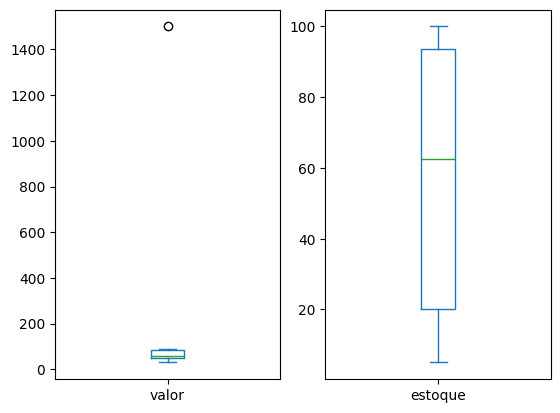

In [54]:
import matplotlib.pyplot as plt
df[['valor', 'estoque']].plot(kind='box', subplots=True, layout=(1, 2))
plt.show()
# O valor 1500 em 'valor' apareceria como um outlier.

## Tratamento:

Investigar: É um erro de digitação ou um dado real?

Remover: Se for um erro claro.

In [55]:
# Exemplo: remover vendas com valor acima de 1000
df = df[df['valor'] <= 1000]
df
#Transformar: Aplicar transformações matemáticas como logaritmo pode reduzir o efeito do outlier.

,produto,data_venda,valor,estoque,cidade
0,Produto A,2025-10-01,50.50,100.0,são paulo
1,Produto B,2025-10-02,70.00,50.0,são paulo
2,Produto C,2025-10-03,30.25,75.0,rio de janeiro
3,Produto A,2025-10-01,50.50,100.0,são paulo
7,desconhecido,2025-10-07,90.10,10.0,recife


### Resumo do Fluxo de Limpeza:

**Inspeção:** head(), info(), describe(), isnull().sum().

**Duplicatas:** duplicated(), drop_duplicates().

**Valores Ausentes:** dropna(), fillna() (com média, mediana, moda ou um valor constante).

**Tipos de Dados:** astype(), pd.to_numeric(), pd.to_datetime().

**Padronização de Texto:** .str.strip(), .str.lower(), replace().

**Outliers:** Identificar (com boxplots ou estatísticas) e decidir se remove, transforma ou mantém.

Seguir essas etapas de forma metódica garante que **seus dados estarão robustos e prontos para a próxima fase** do seu projeto de ciência de dados.